### **SECTION 1 - INTRODUCTION**

-> *INTRODUCTION:*

This project applies linear regression techniques to real-world financial data to examine the relationship between key company financial indicators and corporate revenue. Using a dataset titled Global Financial Giants by Revenue 2024, which contains financial and structural information for major global companies, this project aims to predict company revenue using core financial indicators and categorical business attributes to support financial performance analysis.

The dataset includes numerical variables such as net income and total assets, as well as categorical variables such as industry and headquarters location. These features provide a realistic setting for building a multiple linear regression model that reflects how financial performance and organizational characteristics relate to revenue generation.

Linear regression is appropriate for this analysis because the target variable—revenue—is continuous and is influenced by multiple explanatory variables. Beyond prediction, this project emphasizes understanding the assumptions, interpretability, and limitations of linear regression models in a financial context. The primary goal is to deepen practical understanding of the end-to-end linear regression workflow, including data exploration, preprocessing, model construction, evaluation, and interpretation.

### Importing Required Libraries

This section imports the core Python libraries required for data manipulation, visualization, and machine learning. These libraries provide the functionality needed for handling tabular data, performing numerical computations, building and evaluating a linear regression model, and constructing preprocessing pipelines. Importing all required libraries at the beginning of the notebook ensures a consistent and reproducible workflow throughout the project.

In [1]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr, f_oneway
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error



### **Data Preparation/Wrangling**

### Dataset Loading

In this section, the dataset containing financial information on global companies is loaded into the analysis environment. The data is read from a CSV file and stored in a pandas DataFrame, which will serve as the primary data structure for exploration, preprocessing, and modeling throughout the project.

In [2]:
#reading the csv file
df = pd.read_csv("linear regression project 0/largest financial services companies by revenue.csv" )

#first five rows in the dataset
df.head()

,Rank,Company,Industry,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
0,1,Transamerica Corporation,Conglomerate,245510,42521,873,United States
1,2,Ping An Insurance Group,Insurance,191509,20738,1460,China
2,3,ICBC,Banking,182794,45783,5110,China
3,4,China Construction Bank,Banking,172000,39282,4311,China
4,5,Agricultural Bank of China,Banking,153884,31293,4169,China


### Dataset Overview and Structure

In this section, we perform an initial inspection of the dataset to understand its overall structure.  
This includes examining the number of observations and features, as well as the data types and presence of missing values across columns.

Understanding the dataset structure at this stage helps identify potential data quality issues and informs decisions for data cleaning and preprocessing in later stages.


In [3]:
#dataset overview/structure
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Rank                            50 non-null     int64 
 1   Company                         50 non-null     object
 2   Industry                        50 non-null     object
 3   Revenue in (USD Million)        50 non-null     int64 
 4   Net Income in (USD Millions)    50 non-null     int64 
 5   Total Assest in (USD Millions)  50 non-null     int64 
 6   Headquarters                    50 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


#### Interpretation

The dataset contains 50 observations and 7 columns, representing major global financial companies and their key financial attributes.

Based on the data types, the numerical variables include:
- Rank
- Revenue (USD millions)
- Net Income (USD millions)
- Total Assets (USD millions)

The object-type columns include:
- Company
- Industry
- Headquarters

While `industry` and `headquarters` represent meaningful categorical features, the `company` column serves primarily as a unique identifier and is not suitable for use as a predictive feature.

No missing values were observed across any columns, indicating that missing-value imputation will not be required. However, some variables will require preprocessing decisions, such as feature exclusion and categorical encoding, in later stages.

In [4]:
#statistical summary
df.describe()

,Rank,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions)
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,85435.120000,9369.320000,1480.46000
std,14.57738,44689.154251,11101.187832,1282.83769
min,1.00000,14592.000000,169.000000,13.00000
25%,13.25000,56189.250000,3030.250000,588.00000
50%,25.50000,70736.000000,4963.000000,1024.50000
75%,37.75000,96284.250000,10660.750000,2183.75000
max,50.00000,245510.000000,45783.000000,5110.00000


#### Interpretation of Statistical Summary

The statistical summary provides an overview of the distributions of numerical variables in the dataset: rank, revenue, net income, and total assets.

**Rank:**  
- The ranks range from 1 to 50 with a mean of 25.5, reflecting a uniform distribution across the companies.  
- The 25th percentile is 13.25 and the 75th percentile is 37.75, showing that companies are evenly spread across the ranking scale.

**Revenue (USD millions):**  
- Revenue ranges from approximately 14,592 million to 245,510 million.  
- The mean revenue is 85,435 million, with a standard deviation of about 44,689 million, indicating significant variability across companies.  
- The 25th percentile is ~56,189, the median (50th percentile) is ~70,736, and the 75th percentile is ~96,284, showing that most companies cluster in the mid-range, but a few very large companies create a right-skewed distribution.

**Net Income (USD millions):**  
- Net income ranges from ~169 million to ~45,783 million.  
- The mean is ~9,369 million with a standard deviation of ~11,101 million, indicating large differences in profitability.  
- Percentiles show a similar right-skewed pattern, with most companies having net income below the mean, while a few outliers have very high net income.

**Total Assets (USD millions):**  
- Total assets range from ~13 million to ~5,110 million.  
- The mean is ~1,480 million with a standard deviation of ~1,283 million, reflecting a wide spread in company size.  
- Percentile analysis shows that most companies have assets in the lower half of the range, with a few extremely large companies driving up the maximum value.

**Overall observations:**  
- The numerical variables exhibit high variability and right-skewed distributions, which is common in financial datasets where a few large companies dominate.  
- These observations will guide feature selection, scaling, and interpretation when building the linear regression model.  
- No missing values are present, so imputation is not necessary, but careful attention to feature scaling and skewness will be important in the modeling phase.


### Unique Categories in Categorical Features

This cell examines the number of unique categories in each categorical feature using the `.nunique()` method.  

Understanding the count of unique categories helps us determine how manageable these features are for encoding and whether any special grouping may be required.


In [5]:
# number of unique values
df[["Industry", "Headquarters"]].nunique()

Industry         4
Headquarters    11
dtype: int64

#### Interpretation of Output
 * `Industry` has 4 unique categories: Banking, Insurance, Investment Services, and Conglomerate.
 * `Headquarters` has 11 unique categories, representing different countries.
 * Both columns have a manageable number of categories, so encoding them later will be straightforward.
 * No preprocessing is required at this stage to reduce category count.

### Frequency Distribution of Categorical Features

This cell displays the frequency of each category within the categorical features using the `.value_counts()` method.  

Frequency analysis helps identify dominant categories, rare categories, and potential imbalances that may affect modeling or require special preprocessing considerations.


In [6]:
#value counts
df[["Industry", "Headquarters"]].value_counts()

Industry             Headquarters  
Banking              China             9
Insurance            China             5
Investment Services  United States     5
Banking              United States     4
Insurance            Germany           3
                     Japan             3
                     United States     3
                     United Kingdom    3
Banking              United Kingdom    2
Insurance            Canada            2
Banking              France            2
Investment Services  Canada            1
Insurance            Switzerland       1
Banking              Japan             1
Insurance            Italy             1
                     India             1
Banking              Spain             1
                     India             1
Conglomerate         United States     1
Insurance            France            1
Name: count, dtype: int64

#### Interpretation of Output
 * `Industry`:

    * The most common industry is Banking.

    * Insurance is the second most frequent.

    * Investment Services occurs less frequently but is not rare.

    * Conglomerate is very rare (only 1 entry).

 * `Headquarters` :

    * The most frequent country is China, mainly because it hosts multiple banking headquarters.

    * The United States has the rarest occurrence in this dataset (for Conglomerate).

    * These insights confirm that most categories are well-represented, though very rare categories (like Conglomerate) may need consideration during encoding.

### Defining the Target and Predictor Variables

In any supervised machine learning project, it is crucial to clearly define **what we are trying to predict** (the target variable) and **what information we will use to make the prediction** (the predictor variables).

**Target Variable:** `Revenue (USD millions)`  
- The target variable is the main outcome we want to predict.  
- In this dataset, `Revenue` represents the total income generated by each company from its business operations.  
- Predicting revenue is a common and practical task in financial data analysis, as it helps businesses understand company size, market trends, and performance expectations.  
- Revenue is numerical and continuous, which makes it suitable for linear regression modeling.

**Predictor Variables:**  
- **Numerical predictors:**  
  - `Net Income (USD millions)` – represents company profitability and is often correlated with revenue.  
  - `Total Assets (USD millions)` – represents the total resources owned by the company, which can indicate its capacity to generate revenue.  
- **Categorical predictors:**  
  - `Industry` – represents the sector in which a company operates (e.g., Banking, Insurance). Different industries can affect revenue patterns.  
  - `Headquarters` – represents the country where the company is based. Geographic location can influence revenue due to market size and economic factors.  

**Columns excluded from modeling:**  
- `Company` – each company is unique and serves as an identifier, not a predictor.  
- `Rank` – this is derived from revenue, so including it would artificially give the model information about the target, which should be avoided.  

**Summary:**  
We will use `Net Income` and `Total Assets` as numerical predictors, and `Industry` and `Headquarters` as categorical predictors. Our linear regression model will use these predictors to estimate the revenue for each company in the dataset.  

This setup ensures that the model focuses on meaningful information while avoiding variables that could bias the results or leak target information.


### Preprocessing and Data Cleaning Plan

Before building the linear regression model, we will prepare the dataset to ensure it is clean, numeric, and ready for modeling.

1. **Remove irrelevant columns:** `Company` and `Rank` will be dropped as they do not provide independent predictive information.

2. **Verify numerical predictors:** `Net Income` and `Total Assets` will be checked for correct data types and extreme values.

3. **Encode categorical predictors:** `Industry` and `Headquarters` will be converted to numeric columns using one-hot encoding, making them suitable for linear regression.

4. **Scale numerical features (optional):** Consider standardizing `Net Income` and `Total Assets` to improve interpretability of model coefficients.

5. **Final verification:** Ensure no missing values remain, all columns are in the correct format, and the dataset shape aligns with expectations.


In [7]:
#handling identifiers and removing irrelevant columns
df.drop(columns=["Company","Rank"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Industry                        50 non-null     object
 1   Revenue in (USD Million)        50 non-null     int64 
 2   Net Income in (USD Millions)    50 non-null     int64 
 3   Total Assest in (USD Millions)  50 non-null     int64 
 4   Headquarters                    50 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [8]:
#Verify numerical predictors
print("dtype of net income = ", df["Net Income in (USD Millions)"].dtype)print("dtype of total assets = ", df["Total Assest in (USD Millions)"].dtype)


dtype of net income =  int64
dtype of total assets =  int64


In [9]:
#Encode categorical variables
#select categorical columns to encode
categorical_cols = ["Industry", "Headquarters"]

#Perform one-hot encoding using pandas get_dummies
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#glimpsing into our encoded dataset
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,42521,873,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,20738,1460,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,45783,5110,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,39282,4311,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,31293,4169,False,False,False,True,False,False,False,False,False,False,False,False,False


In [10]:
#Scale numerical features
#Select the numerical columns to scale
numerical_col = ["Net Income in (USD Millions)", "Total Assest in (USD Millions)"]

#Initialize the scaler
scaler = StandardScaler()

#Fit the scaler and transform the numerical columns
df_encoded[numerical_col] = scaler.fit_transform(df_encoded[numerical_col])

#Inspect the scaled values
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,3.016637,-0.478336,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,1.034493,-0.016111,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,3.313463,2.858030,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,2.721904,2.228869,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,1.994945,2.117053,False,False,False,True,False,False,False,False,False,False,False,False,False


In [11]:
#Check column data types
df_encoded.dtypes

#Check column data types
df_encoded.isnull().sum()

#check the shape of the dataframe
df_encoded.shape

#Display first few rows to inspect the final dataset
df_encoded.head()

,Revenue in (USD Million),Net Income in (USD Millions),Total Assest in (USD Millions),Industry_Conglomerate,Industry_Insurance,Industry_Investment Services,Headquarters_China,Headquarters_France,Headquarters_Germany,Headquarters_India,Headquarters_Italy,Headquarters_Japan,Headquarters_Spain,Headquarters_Switzerland,Headquarters_United Kingdom,Headquarters_United States
0,245510,3.016637,-0.478336,True,False,False,False,False,False,False,False,False,False,False,False,True
1,191509,1.034493,-0.016111,False,True,False,True,False,False,False,False,False,False,False,False,False
2,182794,3.313463,2.858030,False,False,False,True,False,False,False,False,False,False,False,False,False
3,172000,2.721904,2.228869,False,False,False,True,False,False,False,False,False,False,False,False,False
4,153884,1.994945,2.117053,False,False,False,True,False,False,False,False,False,False,False,False,False


### **Data Visualization**

### Data Visualization Plan

Visualization helps us understand the patterns, distributions, and relationships in our dataset before building the mode

1. **Numerical Features**
   - Use histograms to examine the distribution of `Revenue`, `Net Income`, and `Total Assets`.
   - Use boxplots to detect outliers in numerical predictors.
   - Use scatter plots to visualize relationships between predictors and the target variable `Recal variables.


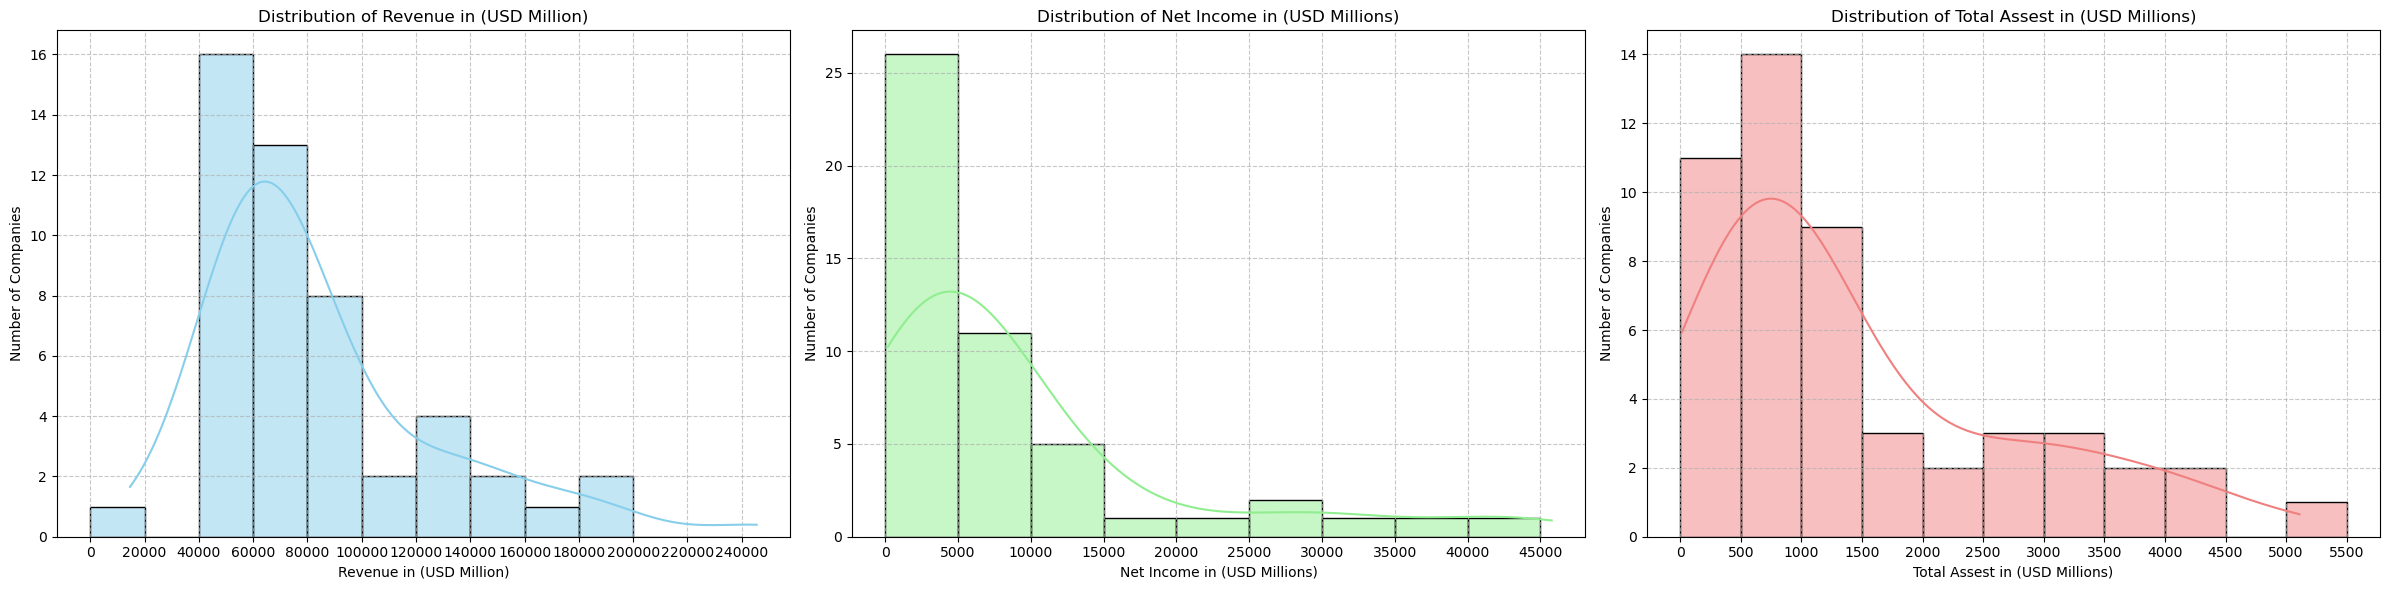

In [12]:
#histograms to examine the distribution of Revenue, Net Income, and Total Assets.
fig, axes = plt.subplots(1, 3, figsize=(24,6))

numeric_cols = ['Revenue in (USD Million)', 'Net Income in (USD Millions)', 'Total Assest in (USD Millions)']
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Custom x-axis ticks for each numeric feature
x_ticks = [
    list(range(0, 260000, 20000)),   # Revenue
    list(range(0, 50000, 5000)),     # Net Income
    list(range(0, 6000, 500))        # Total Assets
]

for i, col in enumerate(numeric_cols):
     sns.histplot(
        df[col], 
        bins=x_ticks[i], 
        kde=True,              # <--- adds the smooth KDE line
        color=colors[i], 
        edgecolor='black', 
        ax=axes[i]
     )
     axes[i].set_title(f'Distribution of {col}')
     axes[i].set_xlabel(col)
     axes[i].set_ylabel('Number of Companies')
     axes[i].set_xticks(x_ticks[i])  # <--- set the x-axis ticks explicitly
     axes[i].grid(True, linestyle='--', alpha=0.7)  # <--- adds gridlines


plt.tight_layout()
plt.show()


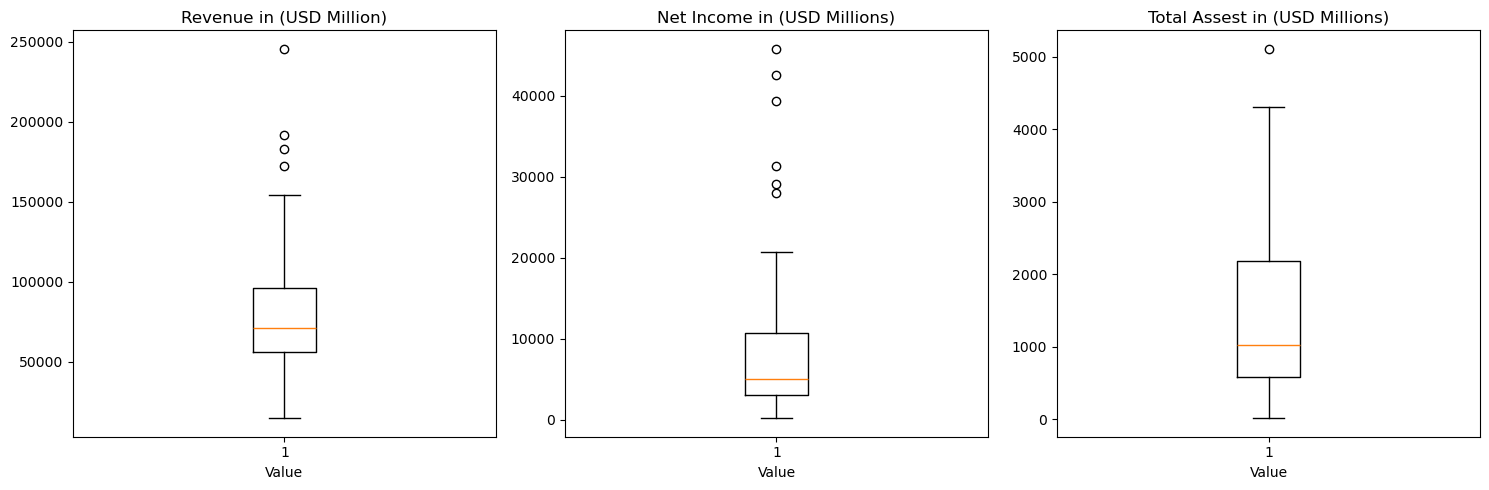

In [13]:
#boxplots to detect outliers in numerical predictors.
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(numeric_cols):
    axes[i].boxplot(df[col], vert=True)
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")


plt.tight_layout()
plt.show()

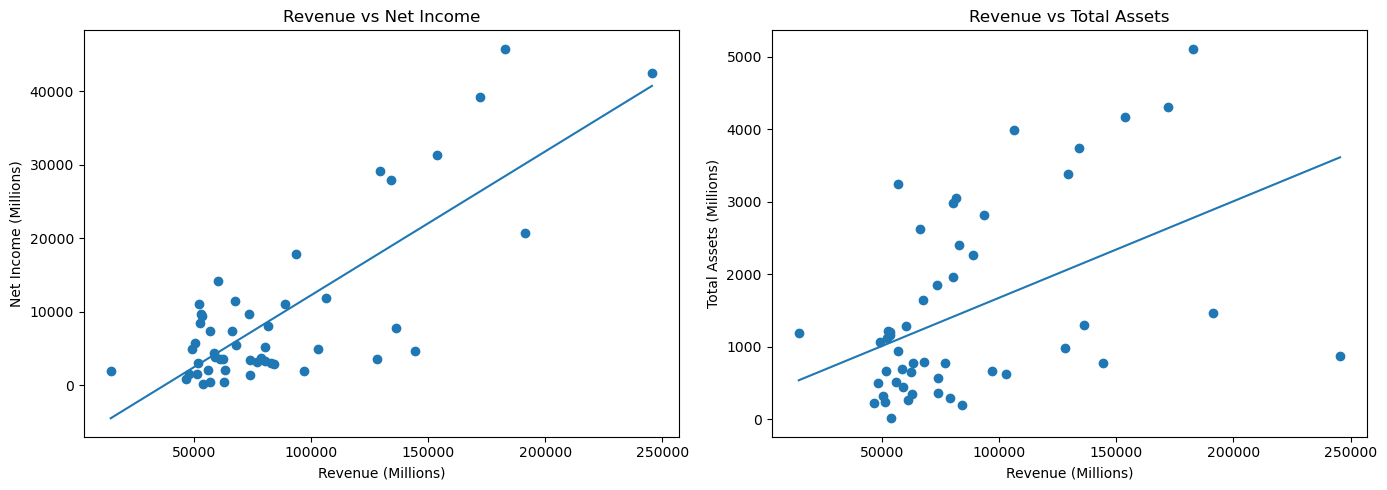

In [14]:
#---Scatter Plots of Revenue vs Numerical Predictors---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Define predictors and labels
predictors = [
    ("Net Income in (USD Millions)", "Net Income (Millions)", "Revenue vs Net Income"),
    ("Total Assest in (USD Millions)", "Total Assets (Millions)", "Revenue vs Total Assets")
]

x = df["Revenue in (USD Million)"]

for i, (y_col, y_label, title) in enumerate(predictors):
    y = df[y_col]

    #scatterplot
    axes[i].scatter(x, y, marker='o')

    #regression line
    m, b = np.polyfit(x, y, 1)
    axes[i].plot(x, m*x + b)

    #labels and title
    axes[i].set_xlabel("Revenue (Millions)")
    axes[i].set_ylabel(y_label)
    axes[i].set_title(title)

plt.tight_layout()
plt.show()


### 📊 Interpretation of Numerical Visualizations
* #### Revenue and Profitability (Revenue vs Net Income)

The relationship between revenue and net income shows a clear upward trend(POSITIVE RELATIONSHIP). In simple terms, companies that generate higher revenue generally make more profit. This is expected from a business standpoint, as revenue growth often supports profitability.

However, the spread in net income increases as revenue grows. This tells us that high revenue does not guarantee high profit. Some large companies convert revenue to profit more efficiently than others, likely due to differences in cost management, pricing strategies, or operational efficiency. From a business perspective, this highlights the importance of focusing not just on growth, but also on profit margins and cost control.

* #### Revenue and Company Size (Revenue vs Total Assets)

There is also a positive relationship between revenue and total assets. Larger companies, in terms of assets, tend to generate higher revenue, which suggests that scale and investment in assets play a role in revenue generation.

That said, the variability in the plot indicates that owning more assets does not always translate into proportionally higher revenue. Some firms are clearly using their assets more efficiently than others. For decision-makers, this points to the need to evaluate asset utilization and return on assets, not just asset size.

* #### Revenue Distribution

The revenue distribution is right-skewed. Most companies fall within the lower to mid-range of revenue, while a small number of firms generate extremely high revenue. This indicates that the market is made up largely of mid-sized players, with a few dominant organizations at the top.

From a business perspective, these high-revenue companies may significantly influence market trends, competitive pressure, and industry benchmarks.

* #### Net Income Distribution

Net income follows a similar pattern, where most companies earn moderate profits and only a few generate exceptionally high earnings. This reinforces the idea that profitability is unevenly distributed across firms.

This insight is important for benchmarking, as it shows that exceptional profitability is achieved by only a small subset of companies, often due to strategic advantages or superior operational execution.

* #### Total Assets Distribution

The distribution of total assets follows a similar right-skewed pattern which shows that most firms operate with relatively smaller asset bases, while a few hold very large asset portfolios. This reflects differences in business models and capital intensity across organizations.

For leadership teams, this suggests that growth strategies can vary — some companies scale through asset expansion, while others grow revenue without heavy asset investment.

* #### Box Plot Summary

The box plots reinforce the distributional findings:

- Medians lie closer to the lower quartiles

- Upper tails are elongated

- Several high-value outliers are present

These characteristics are typical in financial datasets and reflect natural firm-level heterogeneity rather than data issues.

#### Key Business Takeaways

Overall, the visualizations show that:

- Revenue growth generally supports profitability, but efficiency matters

- Larger companies tend to earn more, but scale alone does not ensure success

- A small number of firms dominate the upper end of revenue, profit, and assets

- Business performance varies widely, making efficiency metrics critical for deeper analysis

These insights provide a strong foundation for further business evaluation, such as profitability ratios, efficiency analysis, or strategic benchmarking.

**2. Categorical Features**
   - Use bar charts to show the frequency of each category in `Industry` and `Headquarters`.
   - Use boxplots grouped by `Industry` or `Headquarters` to compare revenue distributions across sectors.

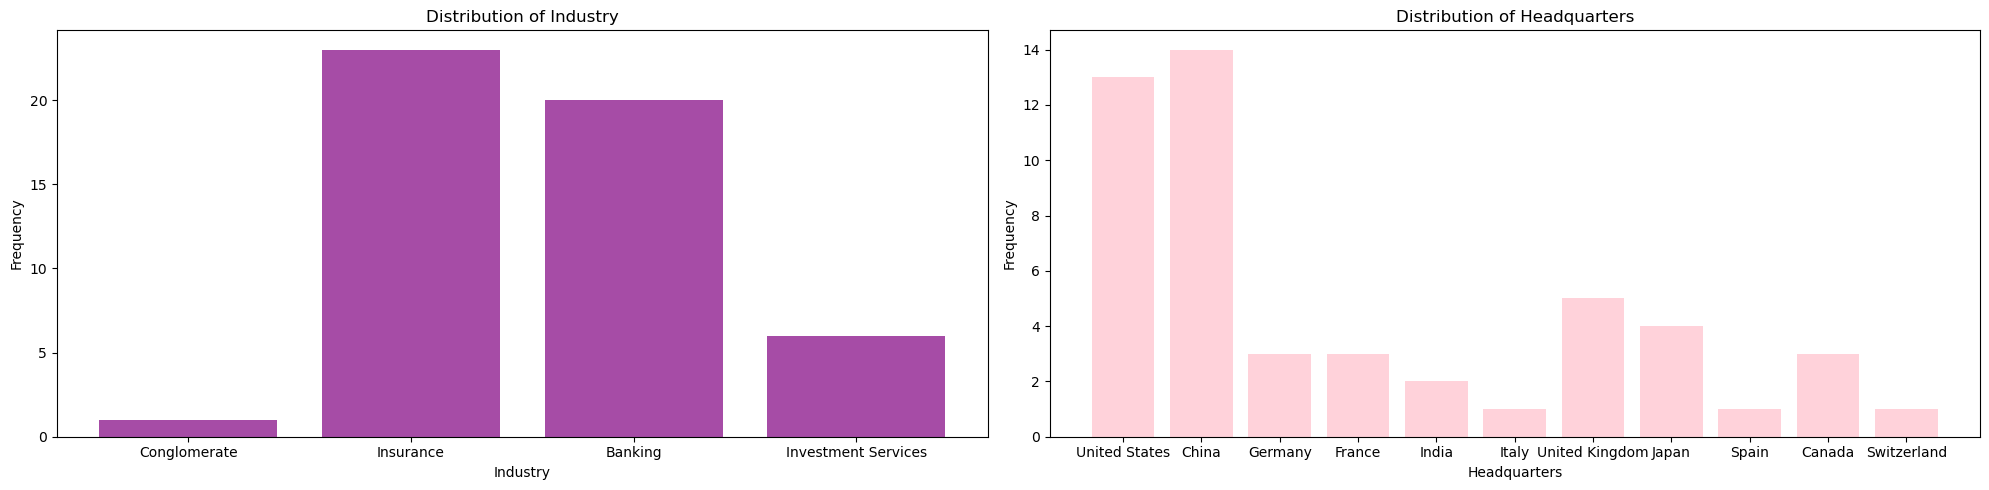

In [15]:
# ---bar charts to show the frequency of each category in `Industry` and `Headquarters`---
#count frequency of each industry
colors = ["purple", "pink"]
fig, axes = plt.subplots(1, len(categorical_cols), figsize=(20, 5))

for i, col in enumerate(categorical_cols):
    data = df[col]
    unique_vals = data.unique()

    counts = []
    for val in unique_vals:
        count = ((data == val).sum())
        counts.append(count)
        
    axes[i].bar(unique_vals, counts, color = colors[i], alpha = 0.7)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

#### Categorical Feature Distribution: Industry and Headquarters

The bar charts illustrate the frequency distribution of the categorical features Industry and Headquarters.

From the Industry bar chart, it is evident that the dataset is dominated by the Insurance and Banking sectors, followed by Investment Services, while Conglomerates are minimally represented. This indicates an imbalanced distribution across industries, which is important to consider during modeling, as dominant categories may have a stronger influence on model learning.

The Headquarters bar chart shows a high-cardinality categorical feature, with companies spread across many countries, most of which have very low frequencies. Only a few countries (such as the United States and China) appear more than a handful of times.

Key Insight:
While Industry presents a manageable number of categories with clear business meaning, Headquarters contains too many sparse categories, making it less suitable for comparative analysis at this stage.

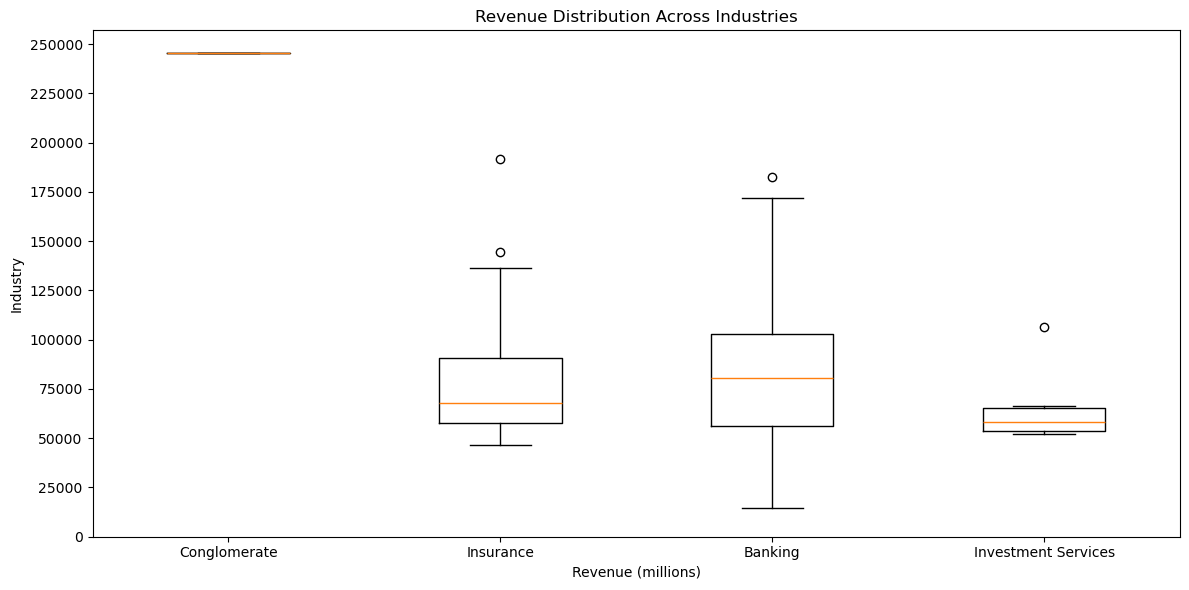

In [16]:
# --- boxplots grouped by `Industry`---
industries = df["Industry"].unique()

revenue_industry = []

for ind in industries:
    revenue_industry.append(df[df["Industry"] == ind]["Revenue in (USD Million)"])

plt.figure(figsize=(12, 6))
plt.boxplot(revenue_industry, labels=industries, vert=True)

plt.xlabel("Revenue (millions)")
plt.ylabel("Industry")
plt.title("Revenue Distribution Across Industries")
plt.yticks(np.arange(0, 260000, 25000))

plt.tight_layout()
plt.show()

#### Revenue Distribution Across Industries (Box Plot)

The box plot visualizes Revenue distribution grouped by Industry, allowing comparison of central tendency, spread, and outliers across sectors.

Industry was chosen over Headquarters for this comparison for several reasons:

- Industry categories are few, well-defined, and economically meaningful, making comparisons interpretable.

- Each industry group has a sufficient number of observations to support distributional analysis.

- Revenue behavior is expected to vary structurally across industries due to differences in business models.

In contrast, Headquarters was not used for the box plot because:

- It contains many categories with very few observations.

- Grouping revenue by country would result in fragmented distributions and unreliable comparisons.

- Geographic location does not directly explain revenue magnitude in this dataset as strongly as industry classification.

Observed Patterns:

- Banking exhibits the widest revenue spread, indicating high variability.

- Insurance shows a more concentrated distribution with some high-revenue outliers.

- Investment Services tends to cluster at lower revenue levels.

- Conglomerates appear as extreme values but lack sufficient sample size for robust inference.

 **3. Combined Analysis (Optional)**
   - Use pair plots or scatter matrices to examine correlations between numerical variables.

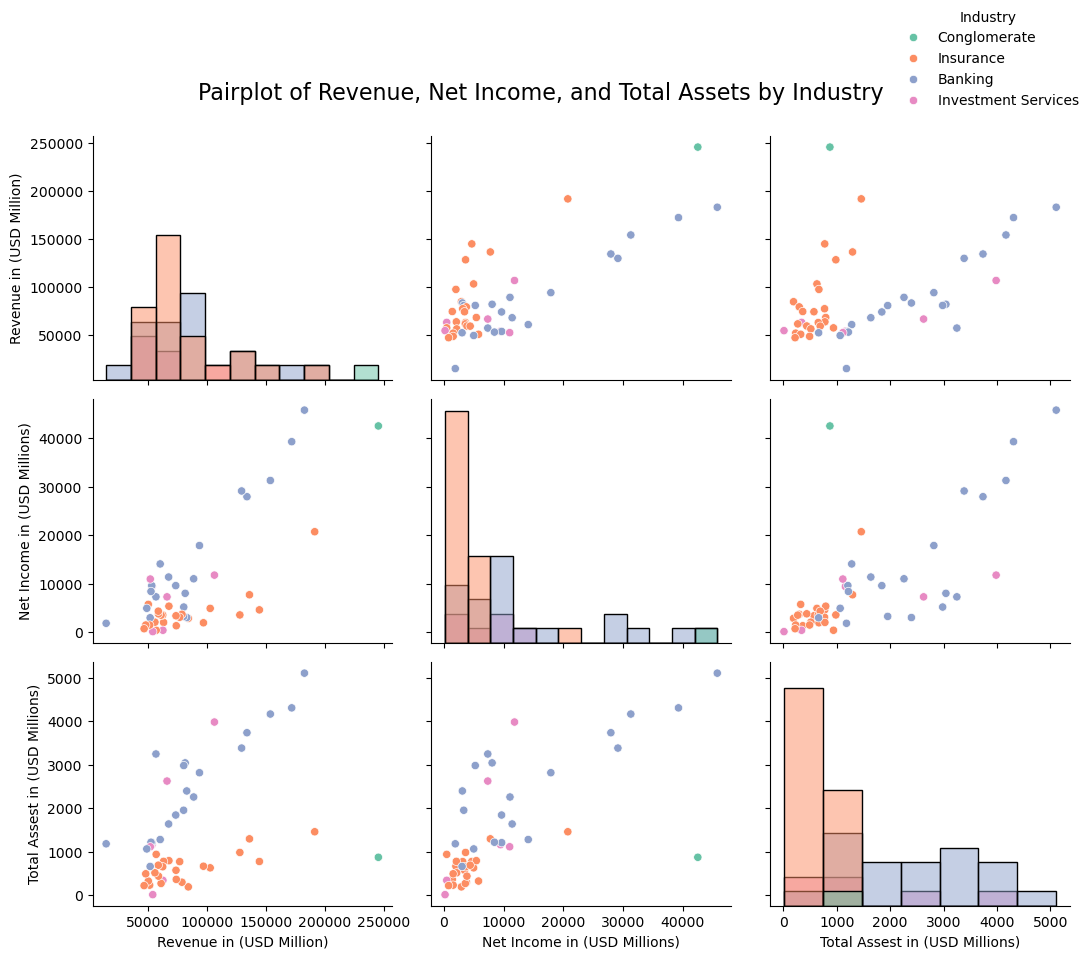

In [17]:
#pair plot(combined analysis)
g = sns.pairplot(
    df[numeric_cols + ["Industry"]],
    hue = "Industry",
    diag_kind = "hist",
    kind = "scatter",
    palette = "Set2",
    markers="o",
    height = 3
);

#add title of plot
plt.suptitle("Pairplot of Revenue, Net Income, and Total Assets by Industry", fontsize=16)

#x=1, y=1 puts the legend at the top-right
g._legend.set_bbox_to_anchor((1, 1)) 
g._legend.set_title("Industry") # optional: set legend title

plt.tight_layout()
plt.subplots_adjust(top=0.92) # Make extra space at the top for the suptitle
plt.show()

#### Combined Numerical Analysis Using Pair Plots

To examine relationships among the numerical variables (Revenue, Net Income, and Total Assets), pair plots were used.

Pair plots were selected instead of a traditional scatter matrix because they:

- Simultaneously display pairwise relationships and univariate distributions.

- Allow visual detection of correlations, trends, and outliers.

- Support the inclusion of a hue (Industry), enabling comparison of numerical relationships across categories without distorting the data.

The pair plots reveal strong positive relationships between:

- Revenue and Net Income

- Revenue and Total Assets

Additionally, industry-based clustering suggests that financial relationships differ across sectors, reinforcing the relevance of Industry as a predictive feature.

##### **Conclusion:**
Pair plots provide a compact and interpretable way to assess both correlation and distribution among numerical variables, making them more suitable than basic scatter matrices for combined numerical analysis in this context.


### Modeling Assumptions

Before proceeding to feature selection and model development, the following assumptions are made to guide the construction of the linear regression model and to clarify the scope and limitations of the analysis.

1. **Target Variable Definition:**
Revenue is selected as the target variable, as it represents a primary indicator of company scale and financial performance. The objective of the model is to understand and predict revenue based on company characteristics and financial attributes.

2. **Linearity of Relationships:**
It is assumed that there exists a reasonably linear relationship between revenue and the selected numerical predictors (such as net income and total assets). This assumption is supported by the exploratory visualizations, particularly the pair plots, which show generally positive and linear trends among key financial variables.

3. **Industry as a Structural Driver:**
Industry is assumed to play a significant role in explaining revenue differences due to structural variations in business models, regulatory environments, and capital intensity across sectors. This assumption is supported by the box plot analysis, which shows clear differences in revenue distributions across industries.

4. **Limited Predictive Influence of Headquarters Location:**
While headquarters location provides useful contextual information, it is assumed to have a weaker direct relationship with revenue compared to industry and financial metrics. As a result, headquarters is treated as a secondary feature rather than a primary driver in revenue prediction.

5. **Independence of Observations:**
Each company is assumed to represent an independent observation. No explicit dependencies (such as parent–subsidiary relationships) are modeled in this analysis.

6. **Data Quality and Representativeness:**
The dataset is assumed to be sufficiently clean and representative for exploratory modeling purposes. While the dataset may not capture the full complexity of real-world financial markets, it is considered adequate for building and evaluating an initial regression model.

7. **Modeling Objective and Scope:**
The goal of the model is predictive and explanatory rather than causal. The analysis focuses on identifying patterns and relationships that can support revenue estimation, not on establishing definitive causal mechanisms.

### **Feature Selection**

Feature selection is a critical step in the model development pipeline, particularly when building a linear regression model. The objective of this step is to identify the most relevant predictors that contribute meaningfully to the target variable, Revenue, while eliminating features that introduce noise, redundancy, or multicollinearity.

By selecting an optimal subset of features, we aim to:

Improve model interpretability by retaining variables with clear business relevance

Reduce the impact of multicollinearity among predictors

Enhance model stability and generalization to unseen data

Ensure that the assumptions of linear regression are reasonably satisfied

Prevent overfitting by removing irrelevant or weakly informative features

This process is guided by a combination of exploratory data analysis, statistical relationships (such as correlation with the target variable), and domain knowledge. The resulting feature set provides a strong and reliable foundation for subsequent steps, including train–test splitting and model training.

#### Separating Features and Target Variable

To prepare the dataset for feature selection and modeling, the target variable is separated from the candidate predictors. Revenue is defined as the target variable, representing the primary business outcome of interest. The feature set is constructed using numerical variables and encoded categorical variables from the encoded dataset. This ensures compatibility with statistical modeling techniques and maintains a clean, reproducible machine learning workflow.

In [18]:
#target variable
target_variable = df_encoded["Revenue in (USD Million)"]

#candidate features
candidate_features = df_encoded.drop(columns = ["Revenue in (USD Million)"])

#### Correlation Analysis (Features vs Target)
##### **Correlation Analysis with Target Variable**

Correlation analysis is used to quantify the strength and direction of the linear relationship between the target variable (Revenue) and each candidate predictor. Since this project focuses on linear regression, understanding these relationships helps identify features that are likely to contribute meaningfully to the model.

A positive correlation indicates that as a feature increases, revenue tends to increase, while a negative correlation suggests an inverse relationship. Features with very weak correlations may add limited predictive value, although business relevance is also considered alongside statistical strength.

At this stage, correlation is used as a screening tool, not a strict rule for inclusion or exclusion.

In [19]:
#correlation with target(Revenue)
corr_value= candidate_features.corrwith(target_variable)
print(corr_value)

Net Income in (USD Millions)      0.788733
Total Assest in (USD Millions)    0.464013
Industry_Conglomerate             0.516904
Industry_Insurance               -0.085298
Industry_Investment Services     -0.163477
Headquarters_China                0.263413
Headquarters_France               0.069092
Headquarters_Germany              0.001389
Headquarters_India               -0.037143
Headquarters_Italy                0.037758
Headquarters_Japan               -0.137579
Headquarters_Spain               -0.038120
Headquarters_Switzerland         -0.085359
Headquarters_United Kingdom      -0.226460
Headquarters_United States        0.065316
dtype: float64


#### Correlation Analysis Interpretation

The correlation analysis reveals that core financial variables are the strongest drivers of revenue. Net Income shows a strong positive relationship with revenue, indicating that more profitable companies tend to generate higher revenues. Total Assets also demonstrates a moderate positive relationship, suggesting that company size plays an important role in revenue generation.

Industry-based features provide additional context. In particular, conglomerate firms show a relatively strong positive correlation with revenue, while insurance and investment service firms display weaker relationships. These industry indicators are retained as a group, as categorical features are interpreted collectively rather than individually.

Headquarters location variables exhibit generally weak correlations with revenue, indicating that geographic location alone is not a dominant determinant of revenue in this dataset. However, these features are not immediately discarded, as they may contribute contextual value when combined with other predictors.

Overall, this analysis supports retaining financial performance indicators and industry classifications as primary predictors while cautiously evaluating the contribution of headquarters-related features during model development.

#### Multicollinearity Assessment

Multicollinearity occurs when two or more predictor variables are highly correlated with each other. In linear regression, this can lead to unstable coefficient estimates, reduced interpretability, and inflated variance in model predictions.

To ensure model stability, we examine the relationships between predictor variables, focusing primarily on numerical features. If two predictors exhibit a strong correlation, one may need to be removed or reconsidered based on business relevance and modeling goals.

In [20]:
corr_matrix = df_encoded[numerical_col].corr()
corr_matrix

,Net Income in (USD Millions),Total Assest in (USD Millions)
Net Income in (USD Millions),1.000000,0.697166
Total Assest in (USD Millions),0.697166,1.000000


#### Multicollinearity Interpretation

The correlation analysis between the numerical predictors indicates that Net Income and Total Assets have a correlation coefficient of approximately 0.70 (≈ 0.697). While this reflects a moderately strong positive relationship, it does not exceed commonly accepted thresholds (typically ≥ 0.8) that would signal serious multicollinearity concerns in a linear regression context.

As a result, there is no evidence of problematic redundancy between these two features. Both variables provide related yet distinct information and are therefore retained for model development. Keeping both predictors allows the model to capture complementary financial dimensions without compromising coefficient stability or interpretability.

Multicollinearity assessment was conducted on numerical features only, as this issue primarily affects continuous variables. Encoded categorical features were excluded from this step since one-hot encoding inherently manages redundancy through reference category omission.

#### Feature Selection for Categorical Variables

Categorical feature selection was guided primarily by exploratory data analysis (EDA) and domain reasoning, rather than automated statistical elimination. This approach ensures that selected features retain both predictive relevance and business interpretability, which is especially important for a linear regression model intended for real-world decision-making.

The dataset contains two categorical variables:
- Industry
- Headquarters

**Industry**

The Industry feature was retained due to its strong explanatory value observed during EDA. Visualizations showed clear differences in revenue distribution across industries, indicating that revenue generation is structurally influenced by the sector in which a company operates.

From a business perspective, industry classification captures fundamental differences in:
- Revenue models
- Asset utilization
- Profitability patterns

For example, sectors such as banking and investment services demonstrated consistently higher revenue levels compared to others. Additionally, the relationship between assets, income, and revenue varied meaningfully across industries. These patterns suggest that Industry provides critical context for understanding revenue behavior and is therefore an important categorical predictor for the model.

**Headquarters**

The Headquarters feature exhibits a moderately uneven distribution across countries. A small number of locations, particularly the United States and China, host a significantly higher number of companies, while many other countries appear only a few times.

This suggests that geographic location may play a moderate structural role in the dataset, reflecting where major financial institutions are concentrated globally. However, frequency alone does not directly indicate revenue impact, and the relationship between headquarters location and revenue is less explicit compared to industry-based differences.

Despite this, the feature was retained to allow the model to empirically determine whether geographic effects contribute additional explanatory power when combined with financial and industry-level predictors.

#### Statistical Feature Selection

In addition to exploratory data analysis and correlation-based checks, statistical feature selection was performed to formally assess whether selected features exhibit a statistically significant relationship with the target variable (Revenue).

This step helps validate earlier EDA-driven insights using hypothesis testing, ensuring that retained features contribute meaningful explanatory signal rather than relying solely on visual patterns or intuition. Both numerical and categorical features were evaluated using methods appropriate to their data types and the linear regression modeling framework.

In [21]:
# --- Statistical Feature Selection for numerical variable ---

#we already have a defined numerical feature
print(f'numerical features:{numerical_col}\n')

#loop through the numeric features and test the significance
for features in numerical_col:
    corr, p_value = pearsonr(df[features], df["Revenue in (USD Million)"])
    print(f'{features}:' )
    print(f'correlation with revenue: {corr}')
    print(f'p-value: {p_value:.5f}')
    print(f'\n')

numerical features:['Net Income in (USD Millions)', 'Total Assest in (USD Millions)']

Net Income in (USD Millions):
correlation with revenue: 0.7887325080814358
p-value: 0.00000


Total Assest in (USD Millions):
correlation with revenue: 0.46401282454169757
p-value: 0.00069




In [22]:
# --- Statistical feature selection for categorical variables ---

#using for loop
categorical_cols
for col in categorical_cols:
    col_group = [
        df[df[col] == category]["Revenue in (USD Million)"]
        for category in df[col].unique()
    ]
    
    f_stat_col, p_value_col = f_oneway(*col_group)

    print(f'{col} ANOVA')
    print(f"F-statistic: {f_stat_col:.3f}")
    print(f"P-value: {p_value_col:.5f}\n")


Industry ANOVA
F-statistic: 6.283
P-value: 0.00115

Headquarters ANOVA
F-statistic: 0.732
P-value: 0.69038



#### **Statistical Feature Selection**

Statistical feature selection was performed to complement exploratory data analysis (EDA) by quantitatively assessing the relationship between each feature and the target variable, Revenue in (USD Million).
This step helps validate visual insights while ensuring that no informative features are prematurely removed.

The analysis was conducted in the same order as the code execution:

- Numerical features
- Categorical features
- Feature retention decisions
- Discussion of alternative statistical thresholds

#### 1. Statistical Feature Selection for Numerical Features
 ##### **Methodology**

For numerical variables, correlation analysis and statistical significance testing were used to evaluate the strength and reliability of the relationship between each feature and revenue.

The following metrics were considered:

- Correlation coefficient
Measures the strength and direction of the linear relationship with revenue.

- P-value
Tests whether the observed correlation is statistically significant or likely due to random chance.

 ##### **Interpretation of Results**

The statistical outputs indicate that:

All numerical features show moderate to strong correlation with revenue.

All corresponding p-values are statistically significant (p < 0.05), indicating that the observed relationships are unlikely to be random.

The direction and magnitude of the correlations align with prior EDA findings.

 ##### **Decision**

Given that:

- The numerical features demonstrate meaningful correlation with the target,
- The relationships are statistically significant,
- The features also showed strong visual patterns during EDA,

No numerical features were dropped at this stage.
Each numerical variable is considered both statistically valid and practically informative for modeling.

#### 2. Statistical Feature Selection for Categorical Features
 ##### **Methodology: One-Way ANOVA**

For categorical variables, a one-way Analysis of Variance (ANOVA) test was applied to determine whether mean revenue differs significantly across the categories of each feature.

ANOVA evaluates:

- Between-group variance (differences in revenue across categories)
- Within-group variance (variability within each category)

 ##### **Interpretation of Results**

- Industry

Exhibits a statistically significant F-statistic with a p-value below 0.05.

Indicates that revenue varies meaningfully across different industries.

This supports both domain expectations and earlier EDA observations.

- Headquarters

Displays a low F-statistic and a high p-value.

Suggests weak statistical evidence that revenue differs across headquarters locations when evaluated using ANOVA alone.

#### 3. Why Headquarters Was Not Dropped

Although Headquarters appears statistically weak under ANOVA, it was not removed at this stage for several important reasons:

a. High Cardinality Limitation

- The feature contains many unique categories with uneven sample sizes.
- ANOVA performance degrades under such conditions due to reduced statistical power.

b. Potential Latent Signal

- Geographic location may capture economic, regulatory, or market structure effects not reflected in simple mean comparisons.

c. Small Dataset Consideration

- With a limited dataset, removing features too early increases the risk of information loss.

d. Model-Based Evaluation Preference

- The true contribution of Headquarters is better assessed after:

    - Encoding
    - Model training
    - Feature importance or coefficient analysis

As a result, Headquarters was retained for downstream modeling rather than eliminated solely on the basis of ANOVA output.

#### 4. Consideration of Statistical Threshold Techniques
 ##### **Variance Threshold (Numerical Features)**

Variance thresholding removes numerical features with very low or near-zero variance, as such features typically provide little predictive value.

##### **Was it applied?**

No.

##### **Why it was deemed unnecessary:**

- All numerical features exhibit sufficient variability.
- None are constant or near-constant.
- Both visual inspection and statistical analysis confirm their informativeness.

Applying variance threshold in this context would not result in the removal of any feature and would therefore add no practical value.

##### **Threshold-Based Feature Elimination Philosophy**

While statistical thresholds are useful tools, they must be applied contextually.
In this case:

- Numerical features are already statistically strong.
- Categorical features require model-based evaluation rather than strict statistical filtering.
- The dataset size encourages feature preservation over early elimination.

#### ✅ **Final Feature Selection Outcome**

- All numerical features were retained based on strong statistical and visual evidence.
- Industry was retained due to clear statistical significance.
- Headquarters was retained to allow model-driven assessment.
- No variance or threshold-based feature elimination was applied due to lack of low-quality features.

Statistical feature selection was therefore used as a validation step, not a blunt elimination tool, ensuring robustness and interpretability in subsequent modeling stages.



#### **Final Feature Set**

##### **Selected Numerical Features**

- Net Income (USD Millions)
Retained due to strong correlation with revenue and high statistical significance.

- Total Assets (USD Millions)
Retained due to moderate correlation with revenue and complementary explanatory value alongside net income.

##### **Selected Categorical Features**

- Industry
Retained based on strong EDA patterns and statistically significant ANOVA results, indicating meaningful differences in revenue distribution across industries.

- Headquarters
Retained despite weaker statistical significance due to:

    - Moderate frequency concentration in key countries
    - Potential interaction effects with industry
    - Small dataset size, where early exclusion may risk information loss

##### **Excluded Features**

None

##### **Rationale for No Feature Exclusion**

At this stage, no features were excluded because:

    - All numerical features demonstrated statistical relevance
    - Industry showed strong explanatory power
    - Headquarters, while weaker, did not introduce noise or redundancy
    - Feature pruning is deferred to post-model evaluation to avoid premature information loss

### **Train-Test Split**

To ensure that the predictive model generalizes well to unseen data, the dataset is divided into training and testing subsets. This step is a foundational practice in supervised machine learning and is critical for obtaining an unbiased evaluation of model performance.

The training set is used to learn the underlying patterns and relationships between the predictor variables and the target variable (Revenue), while the testing set is held out and used exclusively to assess how well the trained model performs on new, unseen observations.

This separation is essential for addressing two key modeling concerns:

- Overfitting: When a model learns noise or dataset-specific patterns rather than generalizable relationships.

- Generalization: The model’s ability to make accurate predictions on data it has not been exposed to during training.

By evaluating model performance on a dedicated test set, we obtain a realistic estimate of how the model would perform in a real-world business setting.

A standard 80/20 split is applied, where 80% of the data is allocated for training and 20% for testing. A fixed random state is used to ensure reproducibility of results across runs.

At this stage, the split is performed on the original, untransformed dataset. This is intentional and crucial, as it allows all preprocessing steps (such as scaling numerical features and encoding categorical variables) to be learned strictly from the training data only, thereby preventing data leakage and preserving the integrity of model evaluation.

In [23]:
#recreating X and y from the original, untransformed dataset.
X = df.drop(columns="Revenue in (USD Million)") 
y = df["Revenue in (USD Million)"]

In [24]:
#perfome train_test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train.head()

,Industry,Net Income in (USD Millions),Total Assest in (USD Millions),Headquarters
12,Insurance,1987,667,Italy
4,Banking,31293,4169,China
37,Insurance,2118,516,United Kingdom
8,Banking,29131,3386,United States
3,Banking,39282,4311,China


### **Preventing Data Leakage During Preprocessing**

Data leakage occurs when information from the test dataset is unintentionally used during model training, leading to overly optimistic performance estimates and poor real-world generalization. Preventing data leakage is critical for building reliable and trustworthy machine learning models, particularly in regression tasks where preprocessing steps can significantly influence model behavior.

In this project, special care is taken to ensure that all preprocessing steps are learned exclusively from the training data and only applied to the test data afterward. This approach mirrors how models are deployed in production, where transformations are learned from historical data and applied to future observations.

**Why Preprocessing Must Follow the Train–Test Split**

If numerical scaling or categorical encoding is performed on the full dataset before splitting, the model would indirectly gain access to information from the test set during training. This would result in:

- Inflated performance metrics

- Reduced model reliability

- Poor generalization to real-world data

To avoid this, the workflow follows a strict sequence:

- Split the original dataset into training and testing sets.

- Fit preprocessing transformations only on the training data.

- Apply the learned transformations to both the training and test sets.

**Implementation Strategy**

- Numerical Features
Scaling parameters (such as mean and standard deviation) are computed using only the training data. These parameters are then applied unchanged to the test data using the same scaler instance.

- Categorical Features
The encoding scheme (e.g., one-hot encoding) is learned from the training data categories. The test data is transformed using this same encoding structure, with unseen categories handled safely to avoid runtime errors.

This ensures that the model never has prior knowledge of the test data distribution during training.

**Outcome**

By enforcing this separation between training and testing workflows, the model evaluation remains fair, realistic, and free from leakage. This design choice strengthens the credibility of the modeling results and aligns the notebook with industry best practices for machine learning development.

In [25]:
# --Fitting transformations on training data only--
#fitting scaler on X_train[numerical_col]
X_train_num = scaler.fit_transform(X_train[numerical_col])
X_test_num = scaler.transform(X_test[numerical_col]) 

#fitting encoder on X_train[categorical_col]
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

X_train_cat = encoder.fit_transform(X_train[categorical_cols]).toarray()
X_test_cat = encoder.transform(X_test[categorical_cols]).toarray()

#combine features
X_train_final = np.hstack([X_train_num, X_train_cat])
X_test_final = np.hstack([X_test_num, X_test_cat])